# Описание задачи: 

Нужно понять вот что: какая задача занимает больше всего времени, и как менялось соотношение по затратам со временем(т.е. как было раньше и как сейчаc).

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Шаг №1. Знакомство с данными

In [47]:
df = pd.read_csv('times.csv', header='infer')

In [48]:
df

,1579648592965,0,:core-ui:preBuild,true,false,true.1,2,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411160,1583510443156,735,:app:mergeDevDebugAndroidTestJavaResource,True,False,True,126,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411165 entries, 0 to 411164
Data columns (total 11 columns):
1579648592965                               411165 non-null int64
0                                           411165 non-null int64
:core-ui:preBuild                           411165 non-null object
true                                        411165 non-null bool
false                                       411165 non-null bool
true.1                                      411165 non-null bool
2                                           411165 non-null int64
2020-01-21T23:16:32,965Z                    411165 non-null object
Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz    411165 non-null object
34359738368                                 411165 non-null int64
Mac OS X 10.15.2 x86_64                     411165 non-null object
dtypes: bool(3), int64(4), object(4)
memory usage: 26.3+ MB


### Вывод:
Мы ознакомились с полученными данными и сразу заметно, что у нас нет пропусков + придется изменять типы данных для дальнейшего анализа.

## Шаг №2. Предобработка данных 

In [50]:
df

,1579648592965,0,:core-ui:preBuild,true,false,true.1,2,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411160,1583510443156,735,:app:mergeDevDebugAndroidTestJavaResource,True,False,True,126,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


Мы видим, что здесь нет названия колонок, поэтому возьмем их из документации. 

Все что сейчас находится в `df.columns` переведем в данные.

In [51]:
df.columns 

Index(['1579648592965', '0', ':core-ui:preBuild', 'true', 'false', 'true.1',
       '2', '2020-01-21T23:16:32,965Z',
       'Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz', '34359738368',
       'Mac OS X 10.15.2 x86_64'],
      dtype='object')

In [52]:
df.loc[411165] = df.columns 

Теперь зададим названия колонкам. 

In [53]:
df.columns = ["timestamp", "num", "task", "success", "did_work", "skipped", "milliseconds", "start_time", "processor", "ram", "os"]

In [54]:
df

,timestamp,num,task,success,did_work,skipped,milliseconds,start_time,processor,ram,os
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,"2020-01-21T23:16:32,965Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411164,1583510443156,739,:app:assembleDevDebugAndroidTest,True,False,False,0,"2020-03-06T16:00:43,156Z",Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


In [55]:
df['num']= pd.to_numeric(df['num'])
df['milliseconds']= pd.to_numeric(df['milliseconds'])
df['success'] = df['success'].astype(bool)
df['did_work'] = df['did_work'].astype(bool)
df['skipped'] = df['skipped'].astype(bool)
df['start_time'] = pd.to_datetime(df['timestamp'], unit='ms')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411166 entries, 0 to 411165
Data columns (total 11 columns):
timestamp       411166 non-null object
num             411166 non-null int64
task            411166 non-null object
success         411166 non-null bool
did_work        411166 non-null bool
skipped         411166 non-null bool
milliseconds    411166 non-null int64
start_time      411166 non-null datetime64[ns]
processor       411166 non-null object
ram             411166 non-null object
os              411166 non-null object
dtypes: bool(3), datetime64[ns](1), int64(2), object(5)
memory usage: 29.4+ MB


In [57]:
df

,timestamp,num,task,success,did_work,skipped,milliseconds,start_time,processor,ram,os
0,1579648592965,1,:core-ui:preDebugBuild,True,False,True,1,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
1,1579648592965,2,:data:preBuild,True,False,True,0,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
2,1579648592965,3,:data:preDebugBuild,True,False,True,1,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
3,1579648592965,4,:feature-loans:preBuild,True,False,True,0,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
4,1579648592965,5,:feature-loans:preDebugBuild,True,False,True,0,2020-01-21 23:16:32.965,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
...,...,...,...,...,...,...,...,...,...,...,...
411161,1583510443156,736,:app:transformClassesWithDexBuilderForDevDebug...,True,True,False,300,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411162,1583510443156,737,:app:mergeProjectDexDevDebugAndroidTest,True,True,False,1817,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411163,1583510443156,738,:app:packageDevDebugAndroidTest,True,True,False,183,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64
411164,1583510443156,739,:app:assembleDevDebugAndroidTest,True,False,False,0,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64


In [114]:
df['seconds'] = df['milliseconds']/1000

In [115]:
df['data'] = df['start_time'].dt.date

In [116]:
df['data'] = pd.to_datetime(df['data'])

In [117]:
top10 = df.pivot_table(index = 'task', values = 'seconds', aggfunc = ('sum')).sort_values(by ='seconds', ascending = False).head(10).index

In [119]:
onlytop10 = df.query('task in @top10').reset_index()

In [120]:
onlytop10

,index,timestamp,num,task,success,did_work,skipped,milliseconds,start_time,processor,ram,os,seconds,data
0,361,1579649226999,179,:app:mergeDevDebugResources,True,True,False,12810,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,12.810,2020-01-21
1,384,1579649226999,202,:data:compileDebugKotlin,True,True,False,30991,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,30.991,2020-01-21
2,554,1579649226999,372,:app:kaptGenerateStubsDevDebugKotlin,True,True,False,46769,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,46.769,2020-01-21
3,667,1579649226999,485,:app:kaptDevDebugKotlin,True,True,False,303,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.303,2020-01-21
4,668,1579649226999,486,:app:compileDevDebugKotlin,True,True,False,106225,2020-01-21 23:27:06.999,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,106.225,2020-01-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,411127,1583510443156,702,:app:compileDevDebugKotlin,True,False,True,240,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.240,2020-03-06
5290,411129,1583510443156,704,:app:compileDevDebugJavaWithJavac,True,False,True,104,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.104,2020-03-06
5291,411133,1583510443156,708,:app:transformClassesWithDexBuilderForDevDebug,True,False,True,301,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.301,2020-03-06
5292,411137,1583510443156,712,:app:packageDevDebug,True,False,True,4,2020-03-06 16:00:43.156,Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz,34359738368,Mac OS X 10.15.2 x86_64,0.004,2020-03-06


In [129]:
data = onlytop10.pivot_table(index= 'task', columns = 'data', values = 'seconds', aggfunc = 'mean')

In [130]:
data

data,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-03,...,2020-02-21,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06
task,,,,,,,,,,,,,,,,,,,,,
:app:compileDevDebugAndroidTestKotlin,NaN,19.137200,20.219444,11.140571,5.217846,7.851435,NaN,NaN,9.165500,8.075833,...,26.3360,NaN,2.48613,15.997500,NaN,3.750333,NaN,NaN,6.926000,3.755812
:app:compileDevDebugJavaWithJavac,12.410,1.265818,1.909917,0.176118,1.996135,0.867828,6.489333,7.282750,3.288455,1.068214,...,3.6276,7.10025,1.19340,2.701636,3.4186,2.235333,12.06750,4.194545,2.999391,0.663238
:app:compileDevDebugKotlin,106.225,23.233000,29.944385,9.534059,24.816622,13.324966,95.636000,118.059250,47.676636,14.171179,...,49.9612,53.50200,14.75948,31.864591,32.9214,21.318524,102.63325,25.980545,29.570120,10.566536
:app:kaptDevDebugKotlin,0.303,2.304062,2.927615,0.484529,2.803297,1.871034,6.759667,2.925000,5.635000,2.202536,...,3.1208,3.32975,1.33440,0.992727,1.3500,2.223714,0.89500,2.634636,2.793577,0.991452
:app:kaptGenerateStubsDevDebugKotlin,46.769,10.568354,13.362846,6.192294,9.357568,6.528034,38.156000,39.247875,19.952636,6.705071,...,28.3745,24.73650,7.72980,17.387545,19.6538,11.926000,20.68400,14.428364,10.753962,5.393500
:app:mergeDevDebugResources,12.810,2.060412,2.745462,0.303353,1.994622,0.456586,8.513333,2.166750,3.061818,1.811241,...,1.0287,0.09000,0.49224,1.051682,0.0638,0.653429,0.29720,2.426455,1.674839,0.337581
:app:packageDevDebug,8.122,2.596024,2.105583,1.405765,1.510034,1.224464,6.694333,6.863000,4.930818,2.525409,...,1.2624,3.92925,0.84636,2.072864,1.1270,0.807714,7.01100,1.253455,1.781087,0.378363
:app:transformClassesWithDexBuilderForDevDebug,81.147,6.835732,6.799250,0.713706,3.596379,2.069107,16.896000,16.788000,10.282636,2.450864,...,2.6740,2.48725,1.54268,3.797250,1.5092,1.031714,16.23350,1.699727,5.020304,0.760163
:app:transformDexArchiveWithDexMergerForDevDebug,19.875,5.588550,5.666333,3.126529,3.173345,2.556286,13.734667,22.693500,15.777091,6.961682,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1, 'Average Opening')

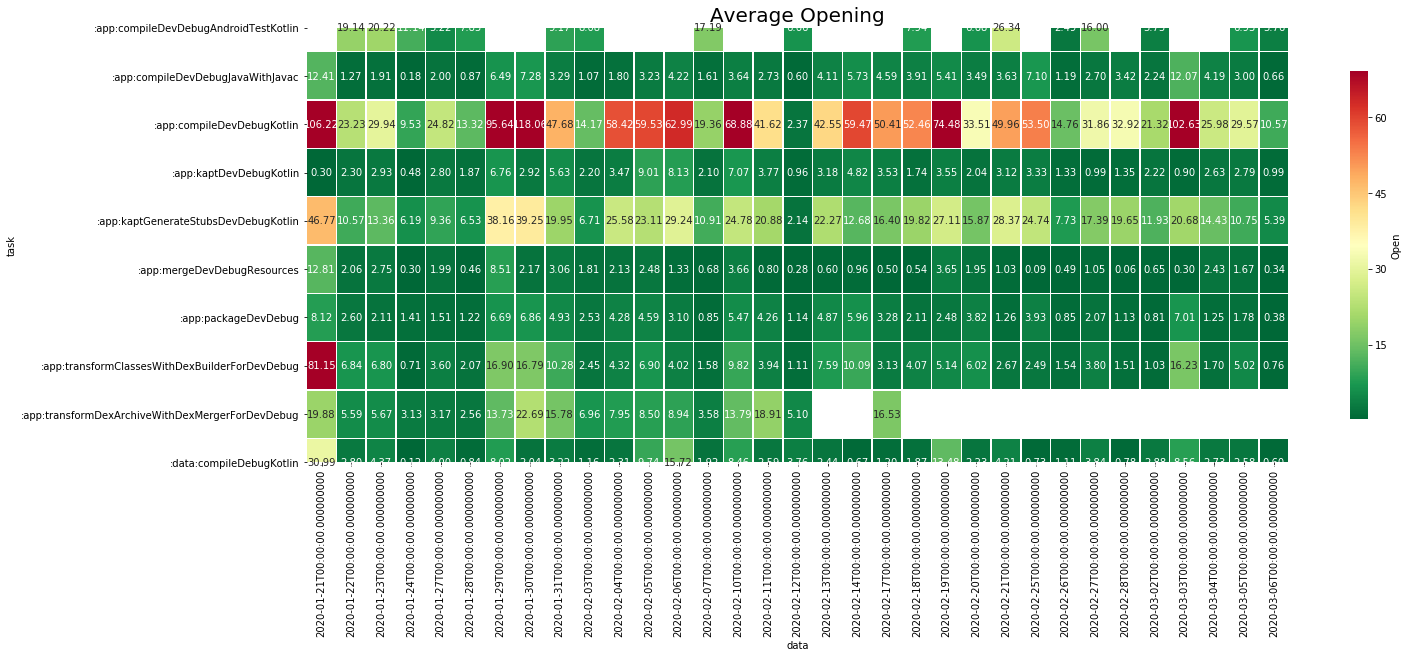

In [134]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(22,8))
ax = sns.heatmap(data, cmap='RdYlGn_r', robust=True,
                 fmt='.2f', annot=True, linewidths=.5, ax=ax,
                 cbar_kws={'shrink':.8, 'label':'Open'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
plt.title('Average Opening', fontdict={'fontsize':20})